In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle


In [37]:
import zipfile
with zipfile.ZipFile('./0128886-210914110416597.zip', 'r') as zip_ref:
    zip_ref.extractall('./training_data/')

In [103]:
np.sum(
    data
    [lambda x: x.species.str.lower() != x.verbatimScientificName.str.lower()]
    .isna()
)

gbifID                     0
occurrenceID               0
eventDate                  6
countryCode                0
stateProvince              1
decimalLatitude            0
decimalLongitude           0
species                   71
verbatimScientificName     0
dtype: int64

In [105]:
columns = [
    'gbifID',
    'eventDate',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'species',
    'verbatimScientificName'
]

country_names = {'AU':'Australia', 'CR':'Costa Rica', 'ZA':'South Africa'}

data = (
    pd.read_csv('./training_data/occurrence.txt', sep='\t')
    [columns]
    [lambda x: (~x.decimalLatitude.isna()) & (~x.decimalLongitude.isna())]
    [lambda x: (x.decimalLatitude != 0.0) & (x.decimalLongitude != 0.0)]
    .assign(
        country =  lambda x: x.countryCode.map(country_names),
        species =  lambda x: x.verbatimScientificName.str.title()
    )
    .drop(['verbatimScientificName', 'countryCode'], 1)
    
)

np.sum(data.isna())/len(data)*100

/tmp/ipykernel_14387/3924403793.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pd.read_csv('./training_data/occurrence.txt', sep='\t')


gbifID              0.000000
eventDate           5.423446
stateProvince       0.308550
decimalLatitude     0.000000
decimalLongitude    0.000000
species             0.000000
country             0.000000
dtype: float64

In [124]:
# import contextily as cx

def plot_species(fig, ax, frog_data, region_name):
    # Bar chart
    bar_data = frog_data.species.value_counts()
    barchart = ax[1].bar(bar_data.index.str.replace(' ', '\n'), bar_data)

    # Colour cycle to ensure colors match in both plots
    prop_cycle = cycle(plt.rcParams['axes.prop_cycle'])
    for i, color in zip(range(len(bar_data)), prop_cycle):
        species_name = bar_data.index[i]
        if len(species_name) > 19:
            display_name = species_name.replace(' ', '\n')
        else:
            display_name = species_name
        barchart[i].set_color(color['color'])
        barchart[i].set_label(f"{display_name}\nCount: {bar_data[i]}")
        filt = frog_data.species == species_name
        # Scatter plot
        ax[0].scatter(frog_data[filt].decimalLongitude, frog_data[filt].decimalLatitude, marker='.', color=color['color'])

    # Add other features
    ax[0].set_title(f"Frog occurrences for {region_name}")
    ax[1].set_title(f"Frog species distribution\nin {region_name}")
    # cx.add_basemap(ax[0], crs=crs, alpha=0.5) # Add basemap
    ax[1].set_xticklabels(bar_data.index.str.replace(' ', '\n'), rotation=45)
    ax[1].legend(loc=(0.50, 0.30))
    return
    
    



/tmp/ipykernel_14387/676584636.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(bar_data.index.str.replace(' ', '\n'), rotation=45)
/tmp/ipykernel_14387/676584636.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(bar_data.index.str.replace(' ', '\n'), rotation=45)
/tmp/ipykernel_14387/676584636.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(bar_data.index.str.replace(' ', '\n'), rotation=45)


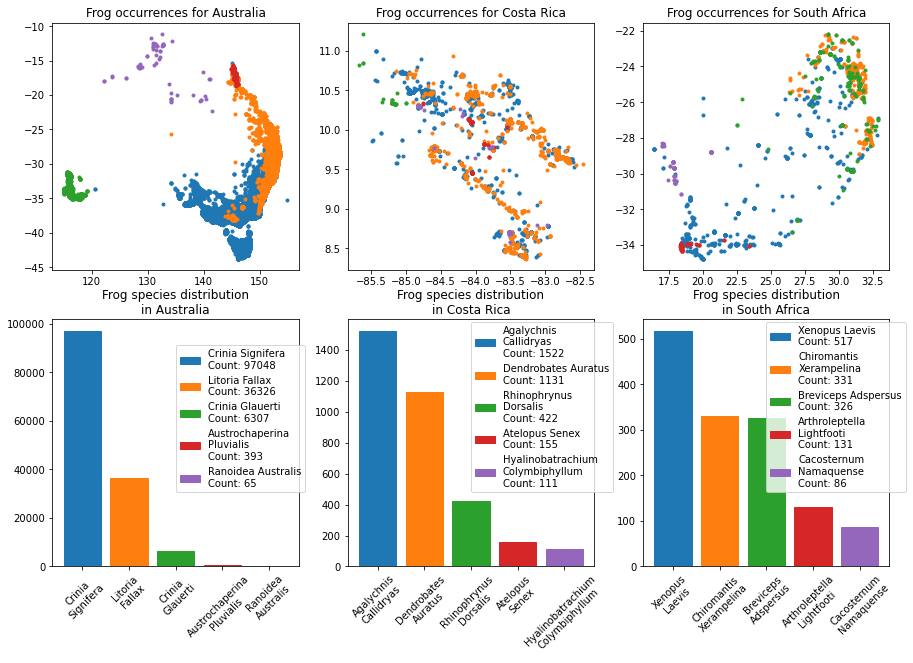

In [125]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))


for i, cnt in enumerate(data.country.unique()):
    filt = data.country == cnt
    plot_species(fig, ax[:, i], data[filt], cnt)
    
plt.show()

In [132]:
def plot_barchart(bar_data, ax):
    barchart = ax.bar(bar_data.index, bar_data)
    prop_cycle = cycle(plt.rcParams['axes.prop_cycle'])
    for i, color in zip(range(len(bar_data)), prop_cycle):
        var_name = bar_data.index[i]
        barchart[i].set_color(color['color'])
        barchart[i].set_label(f"{var_name}\nCount: {bar_data[i]}")
    ax.set_xticklabels(bar_data.index, rotation=45)
    ax.legend()


/tmp/ipykernel_14387/2396249536.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bar_data.index, rotation=45)


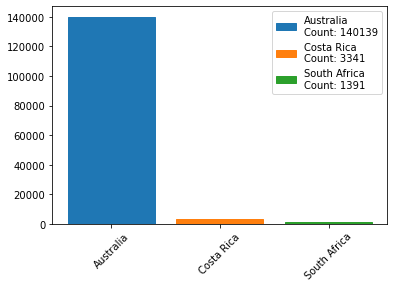

In [133]:
country_bar_data = data.country.value_counts()
fig, ax = plt.subplots()
plot_barchart(country_bar_data, ax)